In [55]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
def euler_rule(x0,y0,dt,f,max):
    x_val = [x0]
    y_val = [y0]
    while x0 < max:
        y0 += dt*f(x0,y0)
        x0 += dt
        x_val.append(x0)
        y_val.append(y0)
        
    return np.array(x_val),np.array(y_val)

In [57]:
def draw(x_val,y_val):
    plt.figure(figsize=(10, 6))
    plt.plot(x_val, y_val, label="Euler's Approximation", marker='o', linestyle='-', color='b')
    plt.show()

Script for Exercise 2 (1):

In [58]:
def f1(x,y):
    x_cos = np.cos(x)
    return x_cos+2*x_cos*y

In [59]:
x0 = 0
y0 = 1/2
dt = 0.01
max = 30

In [60]:
x_val,y_val = euler_rule(x0,y0,dt,f1,max)

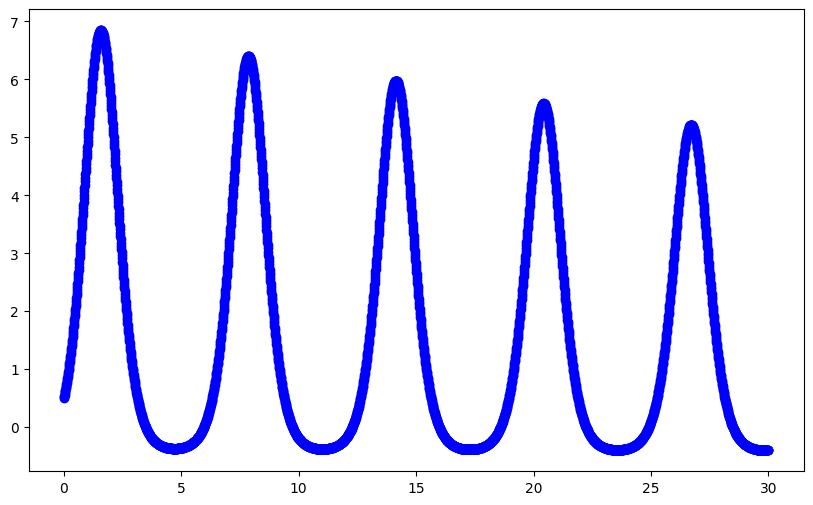

In [61]:
draw(x_val,y_val)

Script for Exercise 2 (2):

In [62]:
x0 = 0
y0 = 0
dt = 0.01
max = 30

In [63]:
def f2(x,y):
    x_cos = np.cos(2*x)
    return 3+2*x_cos-y/4

In [64]:
x_val,y_val = euler_rule(x0,y0,dt,f2,max)

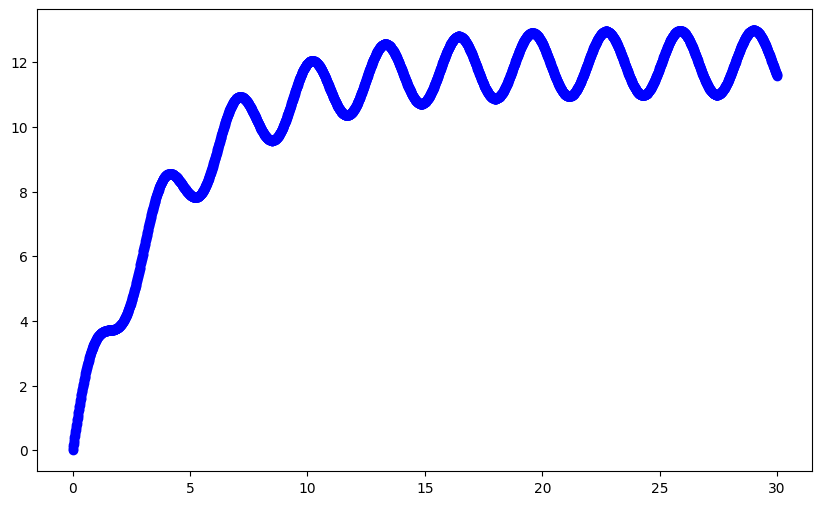

In [65]:
draw(x_val, y_val)

In [3]:
!pip install sympy
import sympy as sp

     |████████████████████████████████| 6.2 MB 3.9 MB/s            
     |████████████████████████████████| 536 kB 8.0 MB/s            
You should consider upgrading via the '/Users/duilzhang/Documents/python/PANDAS/bin/python -m pip install --upgrade pip' command.


In [4]:
def exact_f(f,x_ini,y_ini):
    differential = sp.Eq(y.diff(x), f)
    general = sp.dsolve(differential, y)
    initial_condition = sp.Eq(general.rhs.subs(x, x_ini), y_ini) 
    constant = sp.solve(initial_condition, sp.Symbol('C1'))
    exact = general.subs('C1', constant[0])
    print(general)
    exact_func = sp.lambdify(x, exact.rhs, 'numpy')
    return exact_func

In [5]:
x_ini = 0
y_ini = 0
x = sp.symbols('x')
y = sp.Function('y')(x)
f = 0.1*(20-y)
exact_func = exact_f(f, x_ini, y_ini)

Eq(y(x), C1*exp(-0.1*x) + 20.0)


In [72]:
x_exact = np.linspace(0, 30, 30)
y_exact = exact_func(x_exact)
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val, label="Euler's Approximation", marker='o', linestyle='-', color='b')
plt.plot(x_exact, y_exact, label='Exact Solution', linestyle='--', color='r')
plt.title("Comparison of Euler's Method and Exact Solution")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

TypeError: exact_f() missing 2 required positional arguments: 'x_ini' and 'y_ini'

In [70]:
f = - sp.log(3) * y
x_ini = 0
y_ini = 0
exact_func = exact_f(f, x_ini, y_ini)

TypeError: can't multiply sequence by non-int of type 'Mul'